<div style="background:#ddffff;border-left: 6px solid #2196f3;">
<h1 style="text-align:center;">Principal Component Analysis (PCA)</h1>
<hr style="width:65%;height:2px;border-width:1;color:gray;background-color:gray;">
<p style="padding-left:20px;padding-right:20px;">PCA is calculating the axis of maximal correlation for some data.</p>
<img width="350px" src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f5/GaussianScatterPCA.svg/1024px-GaussianScatterPCA.svg.png">
<p style="padding-left:20px;padding-right:20px;">PCA can be used to reduce the number of dimensions in a dataset.</p>
</div>

In [168]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [169]:
matdat = loadmat('ALMdata.mat')
matdat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Jul 21 07:38:12 2020',
 '__version__': '1.0',
 '__globals__': [],
 'Channel_all': array([[ 1],
        [11],
        [14],
        ...,
        [13],
        [13],
        [14]], dtype=uint8),
 'PSTH_nonprefer_cue_aligned': array([[ 0.11764706,  0.11764706,  0.11764706, ...,  3.76470588,
          3.64705882,  3.76470588],
        [ 0.0862069 ,  0.0862069 ,  0.0862069 , ...,  0.0862069 ,
          0.0862069 ,  0.0862069 ],
        [ 0.        ,  0.        ,  0.        , ...,  0.4       ,
          0.4       ,  0.4       ],
        ...,
        [ 1.53846154,  1.53846154,  1.53846154, ...,  2.15384615,
          2.15384615,  2.15384615],
        [11.16438356, 11.30136986, 11.36986301, ..., 18.42465753,
         18.42465753, 18.49315068],
        [ 3.45238095,  3.51190476,  3.51190476, ...,  2.38095238,
          2.5       ,  2.55952381]]),
 'PSTH_prefer_cue_aligned': array([[ 0.        ,  0.        ,  0.        , ..

In [170]:
nopr = matdat['PSTH_nonprefer_cue_aligned']
pref = matdat['PSTH_prefer_cue_aligned']
t = matdat['t'][0]
channelId = matdat['Channel_all'].flatten()

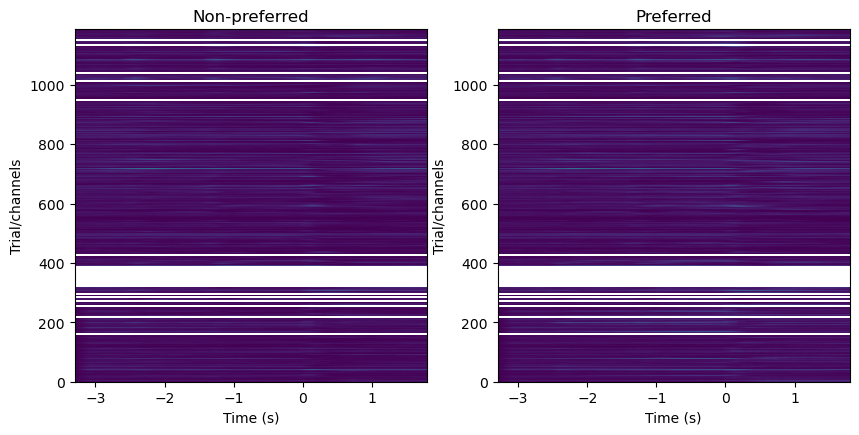

In [171]:
fig,ax = plt.subplots(1,2,figsize=(10, 8))
imageextent = [t[0], t[-1], 0, nopr.shape[0]]

def imshow(index, data, title):
    graph = ax[index]
    graph.imshow(data, extent=imageextent, origin='lower')
    graph.set_aspect(1/graph.get_data_ratio())
    graph.set_xlabel('Time (s)')
    graph.set_ylabel('Trial/channels')
    graph.set_title(title)

imshow(0, nopr, 'Non-preferred')
imshow(1, pref, 'Preferred')
plt.show()

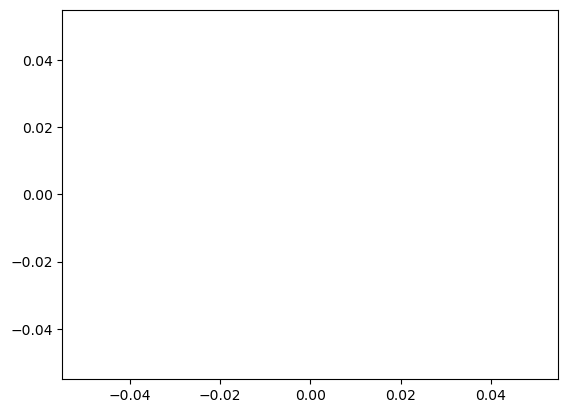

In [172]:
plt.plot(t,nopr[380,:])
plt.show()

In [173]:
# We need to clean the data of nan values
print(nopr[380,:])
nopr = nopr[np.isfinite(nopr[:,0]),:]
print(nopr.shape)

[nan nan nan ... nan nan nan]
(1111, 5101)


In [174]:
cleanFilter = np.isfinite(pref[:,0])
channelId = channelId[cleanFilter]
pref = pref[cleanFilter,:]
print(pref.shape)

(1111, 5101)


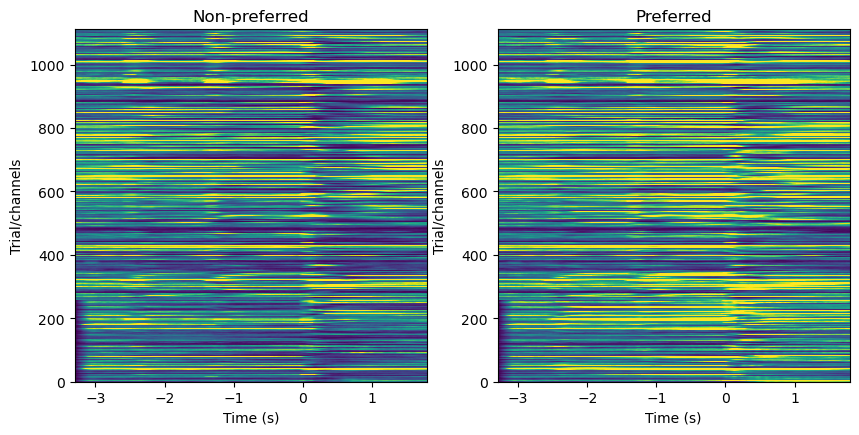

In [175]:
fig,ax = plt.subplots(1,2,figsize=(10, 8))
imageextent = [t[0], t[-1], 0, nopr.shape[0]]

def imshow(index, data, title):
    graph = ax[index]
    graph.imshow(data, extent=imageextent, origin='lower', vmin=0, vmax=10)
    graph.set_aspect(1/graph.get_data_ratio())
    graph.set_xlabel('Time (s)')
    graph.set_ylabel('Trial/channels')
    graph.set_title(title)

imshow(0, nopr, 'Non-preferred')
imshow(1, pref, 'Preferred')
plt.show()

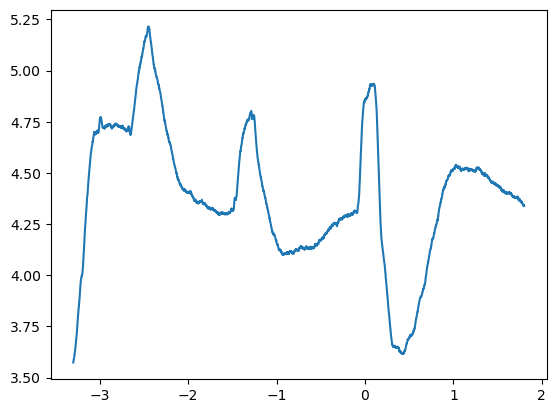

In [176]:
noprmean = [np.mean(nopr[:,col]) for col in range(nopr.shape[1])]
plt.plot(t, noprmean, label='Nonpref')
# or: plt.plot(t, np.mean(nopr,axis=0), label='Nonpref')
plt.show()

In [177]:
# We create a channel covariance matrix

# We filter the data based on channel number
minimum = np.min(channelId)
numberOfChannels = np.max(channelId)

channelAverageNopr = np.zeros((numberOfChannels, len(t)))
channelAveragePref = np.zeros((numberOfChannels, len(t)))
for index in range(minimum, numberOfChannels+1):
    channelAverageNopr[index - 1,:] = np.mean(nopr[channelId==index,:], axis=0)
    channelAveragePref[index - 1,:] = np.mean(pref[channelId==index,:], axis=0)

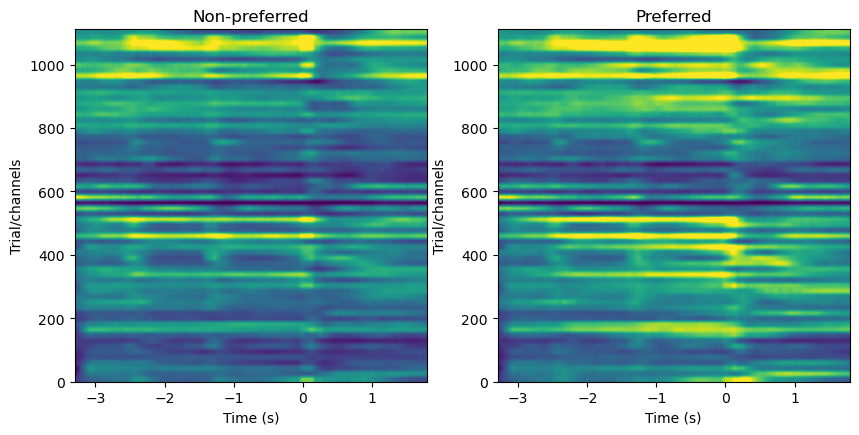

In [178]:
fig,ax = plt.subplots(1,2,figsize=(10, 8))
imageextent = [t[0], t[-1], 0, nopr.shape[0]]

def imshow(index, data, title):
    graph = ax[index]
    graph.imshow(data, extent=imageextent, origin='lower', vmin=0, vmax=10)
    graph.set_aspect(1/graph.get_data_ratio())
    graph.set_xlabel('Time (s)')
    graph.set_ylabel('Trial/channels')
    graph.set_title(title)

imshow(0, channelAverageNopr, 'Non-preferred')
imshow(1, channelAveragePref, 'Preferred')
plt.show()

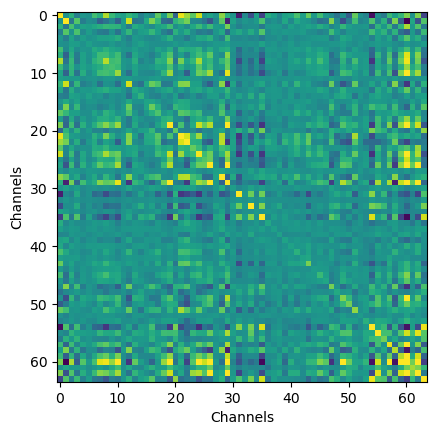

In [179]:
# Covariance matrix
covmatPref = np.cov(channelAveragePref)
covmatNopr = np.cov(channelAverageNopr)

covmat = (covmatPref + covmatNopr) / 2
covmat = covmat - np.matrix(covmat).mean()

plt.imshow(covmat,vmax=2)
plt.xlabel('Channels')
plt.ylabel('Channels')
plt.show()

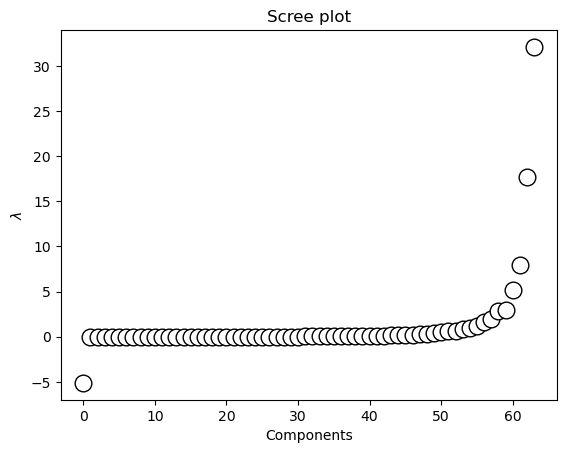

In [180]:
# For the PCA we use eigendecomposition
# an nxn matrix can be decomposed to n eigenvalues and n eigenvectors
# PCA is the eigendecomposition of the covariance matrix
evals,evecs = np.linalg.eigh(covmat) # eigenvalues, eigenvectors
# linalg.eigh should only be used when the matrix is symmetrix. Other than that, use linalg.eig

def plotEvals():
    plt.plot(evals, 'ko', markerfacecolor='w', markersize=12)
    plt.xlabel('Components')
    plt.ylabel('$\lambda$')
    plt.title('Scree plot')
    plt.show()

plotEvals()

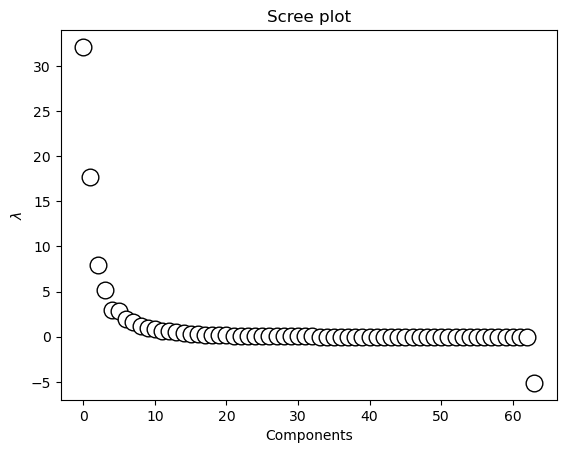

In [181]:
# We want to have it descending
indexes = np.argsort(evals*-1) # argsort gives back the indexes of the original array, sorted by the corresponding data
# instead of np.argsort(evals*-1) we can use np.argsort(evals)[::-1]
evals = evals[indexes]
evecs = evecs[:,indexes]
plotEvals()

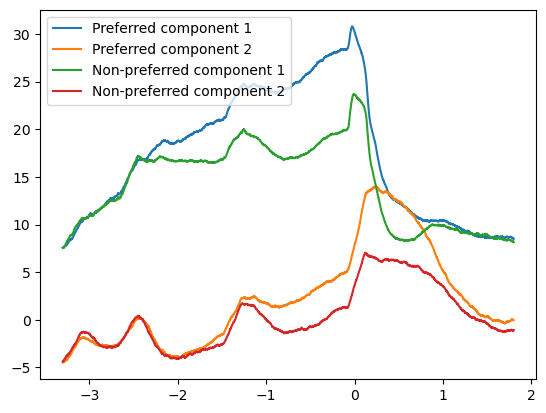

In [182]:
# compute the PC time series

for i in range(2):
    maxi = np.argmax(abs(evecs[:,i]))
    evecs[:,i] *= np.sign(evecs[maxi,i])
pcNopr = evecs[:,:2].T @ channelAverageNopr
pcPref = evecs[:,:2].T @ channelAveragePref

plt.plot(t,pcPref.T)
plt.plot(t,pcNopr.T)
plt.legend([
    'Preferred component 1',
    'Preferred component 2',
    'Non-preferred component 1',
    'Non-preferred component 2'
])
plt.show()

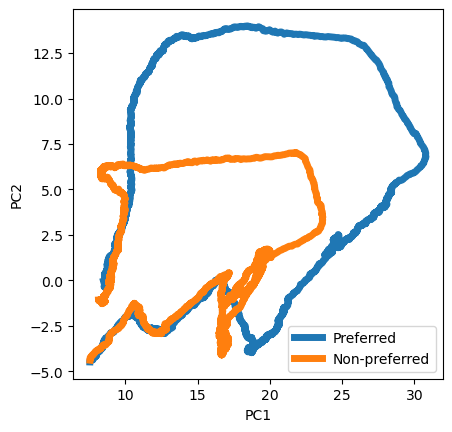

In [191]:
# State space trajectories
plt.plot(pcPref[0,:],pcPref[1,:],linewidth=5)
plt.plot(pcNopr[0,:],pcNopr[1,:],linewidth=5)
plt.legend(['Preferred', 'Non-preferred'])
plt.gca().set_aspect(1 / plt.gca().get_data_ratio())
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

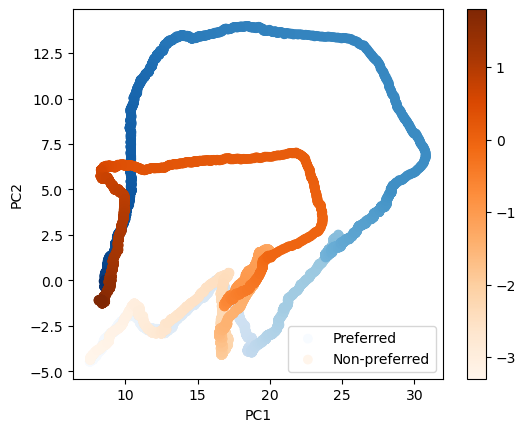

In [203]:
# On the last diagram it is difficult to figure out which direction time is flowing. Usually we use hue values for it.
plt.scatter(pcPref[0,:],pcPref[1,:],cmap='Blues',c=t)
plt.scatter(pcNopr[0,:],pcNopr[1,:],cmap='Oranges',c=t)
plt.legend(['Preferred', 'Non-preferred'])
plt.gca().set_aspect(1 / plt.gca().get_data_ratio())
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar()
plt.show()